In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the Iris dataset
df = pd.read_csv("../data/iris.data")

# Extract the features matrix
X = df.iloc[:, [2, 3]].values

# Extract the class labels
y = df.iloc[:, 4].values

# Convert class labels to three integers
y = np.where(y == "Iris-setosa", 0, np.where(y == "Iris-versicolor", 1, 2))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Initialize the StandardScaler
sc = StandardScaler()

# Standardize the features
sc.fit(X_train)

# Apply the scaler to the training set
X_train_std = sc.transform(X_train)

# Initialize the SVM
svm = SVC(kernel='linear', C=1.0, random_state=1)

# Train the SVM
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx=None):
    # setup marker generator y color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plotear la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # graficar los ejemplos de cada clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}',
                    edgecolor='black')
    
    # resaltar muestras de test si test_idx está definido
    if test_idx is not None:
        # Extraemos las muestras de test
        X_test, y_test = X[test_idx, :], y[test_idx]
        # Se pueden graficar con un contorno o un marcador distinto
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black',
                    alpha=1.0, linewidth=1.5, marker='o',
                    s=100, label='Test set')


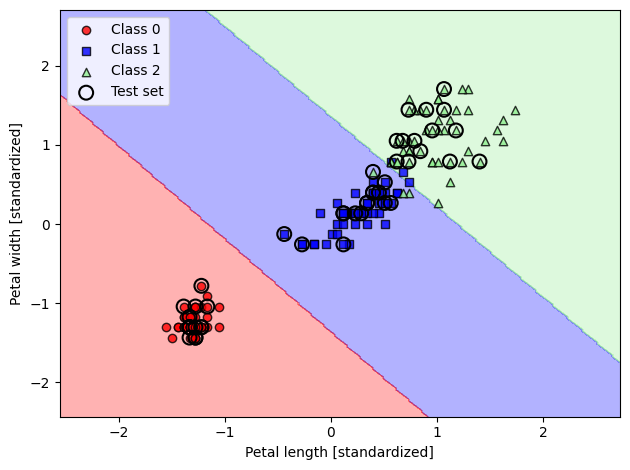

In [23]:
X_combined_std = np.vstack((X_train_std, sc.transform(X_test)))
y_combined = np.hstack((y_train, y_test))

# Ahora, los índices de prueba corresponden a la parte final del conjunto combinado
test_idx = range(X_train_std.shape[0], X_combined_std.shape[0])

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=test_idx)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')  # SGD Perceptron classifier
lr = SGDClassifier(loss='log')          # SGD logistic regression classifier
svm = SGDClassifier(loss='hinge')       # SGD SVM classifier

# Train SGD perceptron classifier
ppn.fit(X_train_std, y_train)
ppn.partial_fit(X_test, y_test)

# Train SGD logistic regression classifier
lr.fit(X_train_std, y_train)
lr.partial_fit(X_test, y_test)

# Train SGD SVM classifier
svm.fit(X_train_std, y_train)
svm.partial_fit(X_test, y_test)

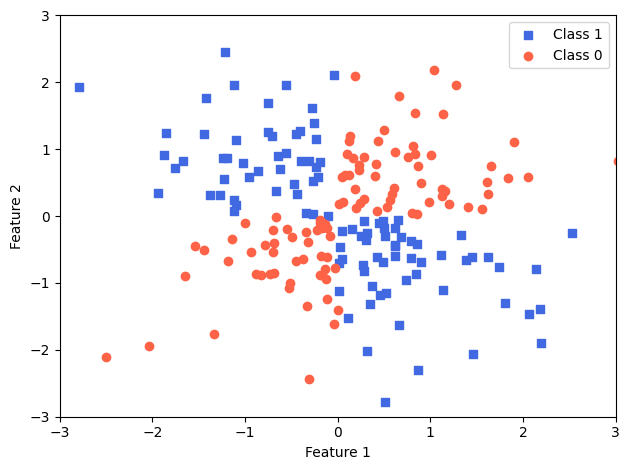

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# XOR dataset with random noise
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='tomato', marker='o', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

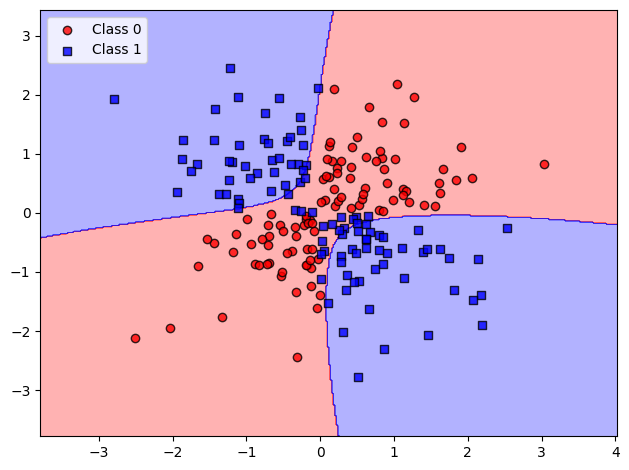

In [28]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

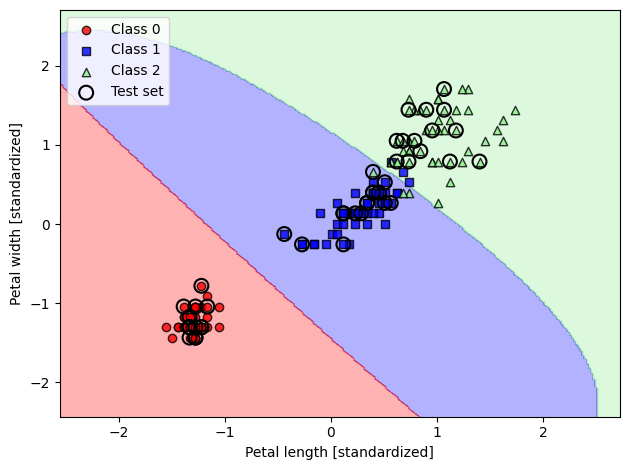

In [ ]:
# Low gamma value

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

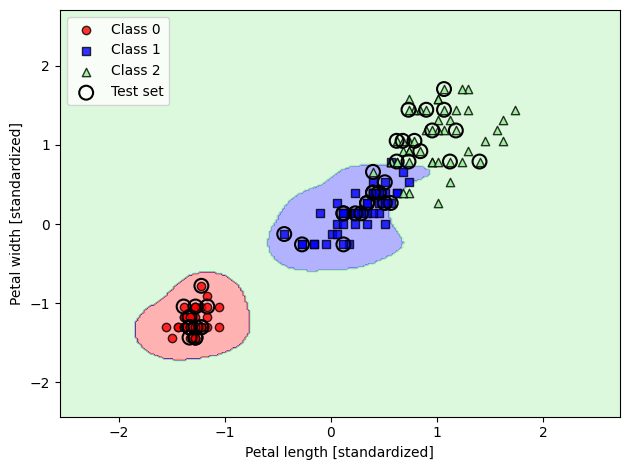

In [47]:
# High gamma value

svm = SVC(kernel='rbf', random_state=1, gamma=10, C=100.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()